 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [5]:
# Initial imports
import pandas as pd
import numpy as np
from datetime import datetime as dt
from pathlib import Path
import os
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
path=os.getcwd()
csv_path1=path+"\\Resources\whale_returns.csv"
whale_returns = pd.read_csv(csv_path1, index_col="Date")
whale_returns.sort_values("Date")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [7]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
path=os.getcwd()
csv_path2=path+"\\Resources/algo_returns.csv"
algo_returns = pd.read_csv(csv_path2, index_col="Date")
algo_returns.sort_values("Date")

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [10]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
path=os.getcwd()
csv_path3=path+"\\Resources\sp500_history.csv"
sp500_history = pd.read_csv(csv_path3)

In [13]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"]
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history['Date'] = pd.to_datetime(sp500_history['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
sp500_history.set_index(sp500_history['Date'], inplace=True)
sp500_history = sp500_history.drop(columns=["Date"])
sp500_history.sort_values("Date")
sp500_history = sp500_history.iloc[::-1]
sp500_history.head()

<ipython-input-14-f065e1a78926>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [15]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [16]:
# Drop nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [17]:
sp500_daily_returns = sp500_daily_returns.dropna().copy()

In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_daily_returns.rename(columns={
    "Close": "SP500 Daily Return",})
sp500_df = sp500_returns

## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
join_returns = pd.merge(algo_returns, whale_returns, on='Date', how='inner')
joined_returns = pd.merge(sp500_df, join_returns, on='Date', how='inner')

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

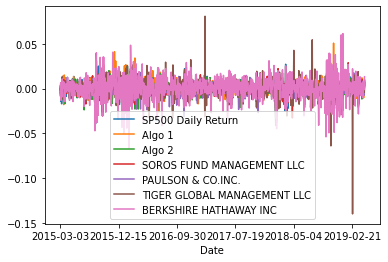

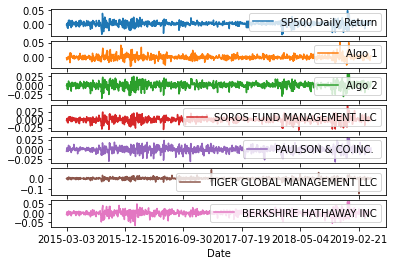

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot daily returns of all portfolios
returns_plots = joined_returns.plot()
returns_plots = joined_returns.plot(subplots=True)
fig = plt.figure()

#### Calculate and Plot cumulative returns.

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_ret = (joined_returns + 1).cumprod()

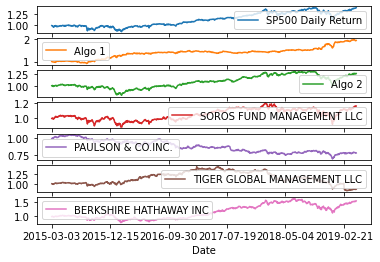

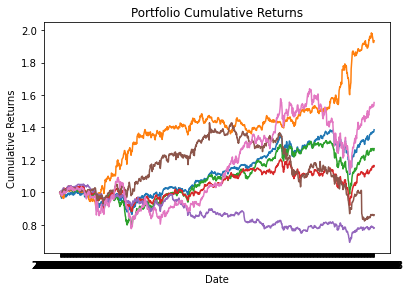

In [22]:
# Plot cumulative returns
cumulative_plots = cumulative_ret.plot(subplots=True)
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


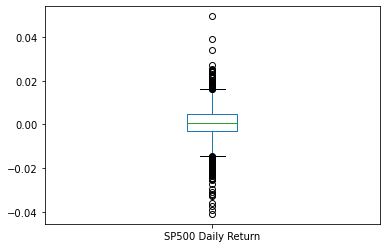

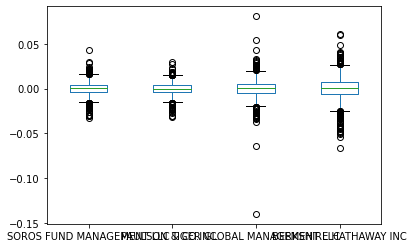

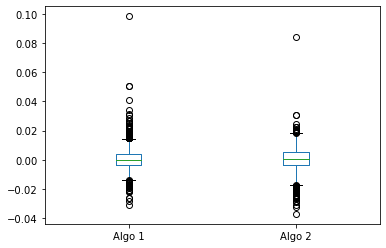

In [23]:
# Box plot to visually show risk
returns_std = joined_returns.std()
sp500_std_plots = sp500_df.plot.box()
whales_std_plots = whale_returns.plot.box()
algos_std_plots = algo_returns.plot.box()


### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
returns_std

SP500 Daily Return             0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500
daily_std = returns_std.sort_values(ascending=False)
# Determine which portfolios are riskier than the S&P 500
print(daily_std)
print(f'_________')
print(f'These portfolios are riskier than the S&P 500:')
print(f"BERKSHIRE HATHAWAY INC")
print(f'TIGER GLOBAL MANAGEMENT LLC')

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500 Daily Return             0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64
_________
These portfolios are riskier than the S&P 500:
BERKSHIRE HATHAWAY INC
TIGER GLOBAL MANAGEMENT LLC


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = returns_std * np.sqrt(252)
annualized_std.head(7)

SP500 Daily Return             0.135786
Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_returns.rolling(window=21).std()

,SP500 Daily Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006498,0.005760,0.007053,0.006711,0.006224,0.007532,0.009731
2019-04-17,0.006537,0.006229,0.007165,0.006773,0.006370,0.007574,0.009485
2019-04-18,0.006470,0.005834,0.007172,0.006633,0.006303,0.007328,0.009475


<AxesSubplot:xlabel='Date'>

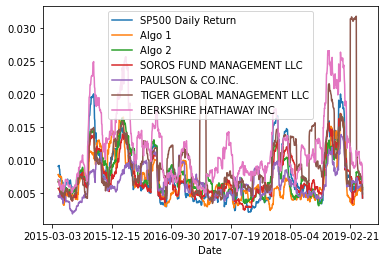

In [28]:
# Plot the rolling standard deviation
joined_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
price_correlation = joined_returns.corr()

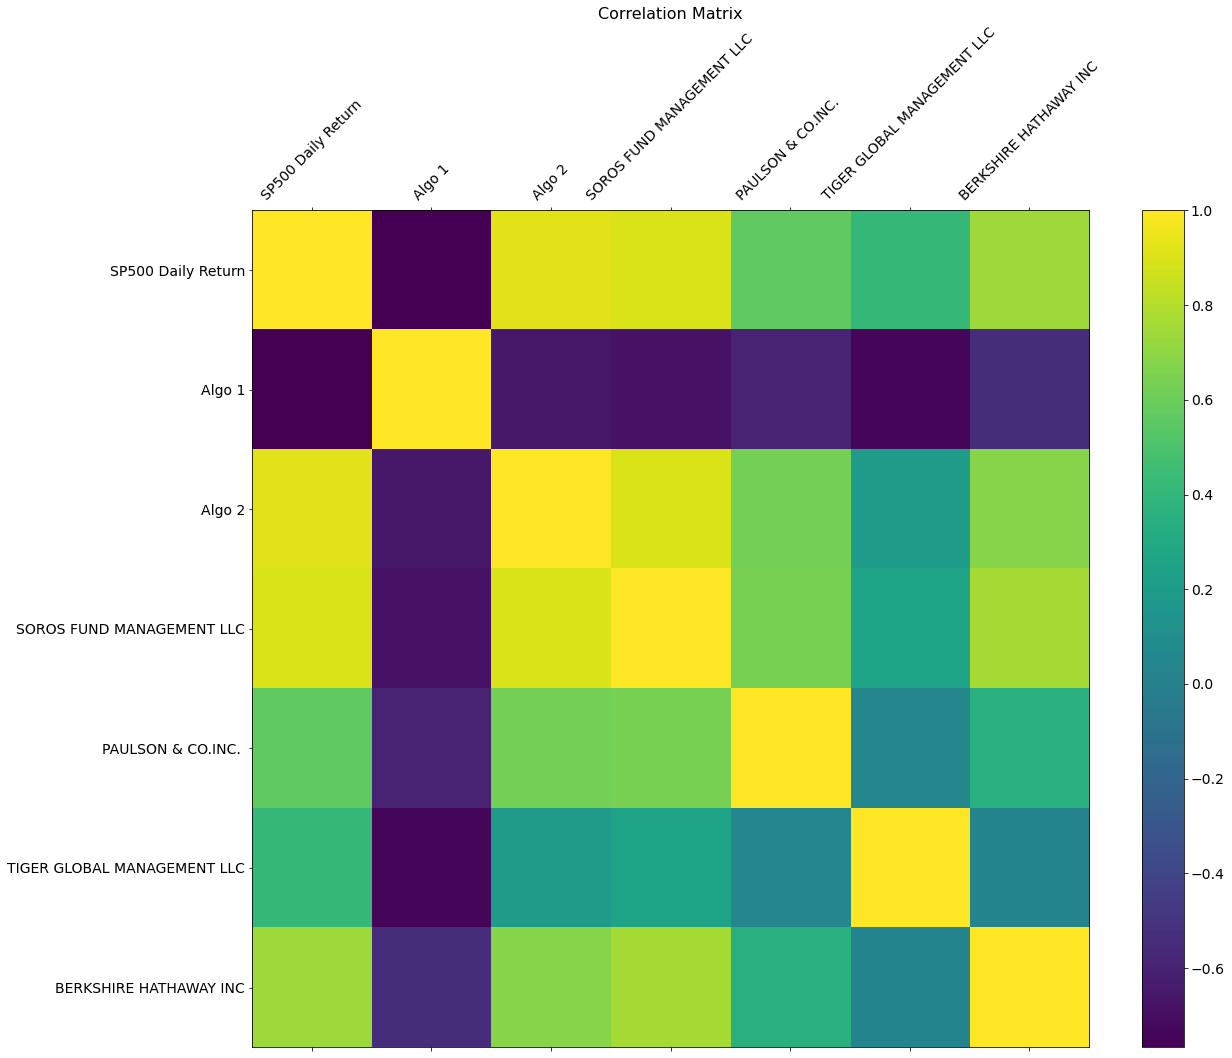

In [30]:
# Display de correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(price_correlation.corr(), fignum=f.number)
plt.xticks(range(price_correlation.select_dtypes(['number']).shape[1]), price_correlation.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(price_correlation.select_dtypes(['number']).shape[1]), price_correlation.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [31]:
# Calculate covariance of a single portfolio
covariance = joined_returns["SOROS FUND MANAGEMENT LLC"].cov(joined_returns["SP500 Daily Return"])

In [32]:
# Calculate variance of S&P 500
variance = joined_returns['SP500 Daily Return'].var()

In [33]:
# Computing beta
soros_beta = covariance / variance
soros_beta

0.7733753547794618

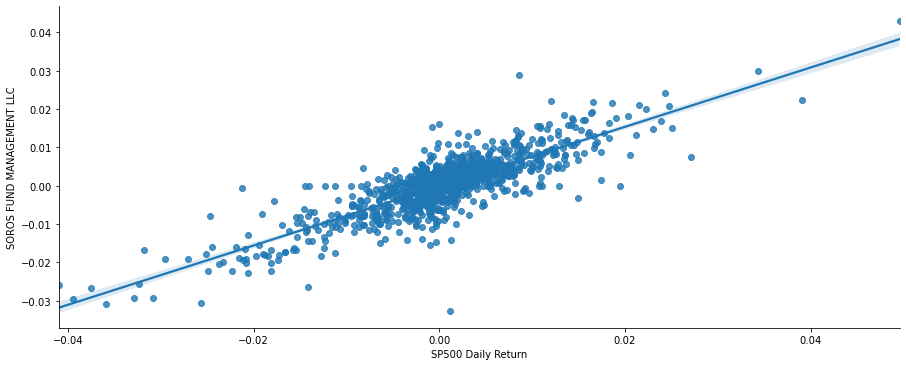

In [34]:
# Plot beta trend
sns.lmplot(x='SP500 Daily Return', y='SOROS FUND MANAGEMENT LLC', data=joined_returns, aspect=2.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [35]:
# Use `ewm` to calculate the rolling window
returns_ewm = joined_returns.ewm(halflife=21).mean()
returns_ewm

,SP500 Daily Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004462,-0.005320,0.000761,0.000511,-0.000802,-0.001532,-0.001089
2015-03-05,-0.002514,-0.003817,0.001988,0.001718,0.000878,-0.000193,0.001603
2015-03-06,-0.005575,-0.004116,-0.001542,-0.000808,-0.000291,-0.002369,-0.002256
2015-03-09,-0.003543,-0.004400,-0.000935,-0.000511,0.000673,-0.000616,-0.002128
...,...,...,...,...,...,...,...
2019-04-16,0.001352,0.000912,0.001364,0.001480,0.000448,-0.000813,0.001862
2019-04-17,0.001234,0.000548,0.001150,0.001338,0.000223,-0.000930,0.001906
2019-04-18,0.001246,0.000511,0.001073,0.001341,0.000256,-0.000881,0.001907


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# Annualized Sharpe Ratios
sharpe_ratio = ((joined_returns.mean()-joined_returns['SP500 Daily Return'].mean()) * 252) / (joined_returns.std() * np.sqrt(252))
sharpe_ratio

SP500 Daily Return             0.000000
Algo 1                         0.650964
Algo 2                        -0.163336
SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

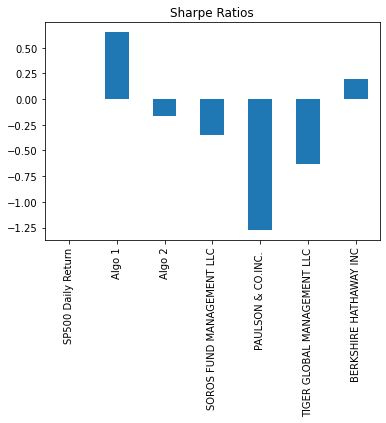

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Based on the Sharpe Ratio, Standard Deviation, and Rate of Return - Algo 1 presents itself as outperforming all the portfolios evaluated and to a lesser degree, Algo 2 accomplishes the same. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [38]:
# Reading data from 1st stock
path=os.getcwd()
csv_path10=path+"\\Resources\goog_historical.csv"
goog_return = pd.read_csv(csv_path10)
goog_return['Trade DATE'] = pd.to_datetime(goog_return['Trade DATE'], dayfirst=True).dt.strftime('%Y-%m-%d')
goog_returns = goog_return.sort_values("Trade DATE")
goog_returns = goog_returns.rename(columns={
    "Trade DATE" : "Date",
    "NOCP": "GOOG Price",
})
goog_returns.set_index(goog_returns['Date'], inplace=True)
goog_returns = goog_returns.drop(columns=["Date", "Symbol"])

In [39]:
# Reading data from 2nd stock
path=os.getcwd()
csv_path11=path+"\\Resources/aapl_historical.csv"
aapl_return = pd.read_csv(csv_path11)
aapl_return['Trade DATE'] = pd.to_datetime(aapl_return['Trade DATE'], dayfirst=True).dt.strftime('%Y-%m-%d')
aapl_returns = aapl_return.sort_values("Trade DATE")
aapl_returns = aapl_returns.rename(columns={
    "Trade DATE" : "Date",
    "NOCP": "AAPL Price",
})
aapl_returns.set_index(aapl_returns['Date'], inplace=True)
aapl_returns = aapl_returns.drop(columns=["Date", "Symbol"])

In [40]:
# Reading data from 3rd stock
path=os.getcwd()
csv_path12=path+"\\Resources/cost_historical.csv"
cost_return = pd.read_csv(csv_path12)
cost_return['Trade DATE'] = pd.to_datetime(cost_return['Trade DATE'], dayfirst=True).dt.strftime('%Y-%m-%d')
cost_returns = cost_return.sort_values("Trade DATE")
cost_returns = cost_returns.rename(columns={
    "Trade DATE": "Date",
    "NOCP": "COST Price",
})
cost_returns.set_index(cost_returns['Date'], inplace=True)
cost_returns = cost_returns.drop(columns=["Date","Symbol"])

In [41]:
# Combine all stocks in a single DataFrame
stocks_returns = pd.concat([cost_returns, goog_returns, aapl_returns], axis="columns", join="inner")

In [42]:
# Calculate daily returns
stocks_dailyreturns = stocks_returns.pct_change()
stocks_dailyreturns.head()
# Drop NAs
stocks_dailyreturns = stocks_dailyreturns.dropna().copy()
# Display sample data
stocks_dailyreturns.tail()

,COST Price,GOOG Price,AAPL Price
Date,,,
2019-11-03,0.100470,0.073744,0.055893
2019-11-04,0.050285,0.024546,0.112074
2019-12-02,-0.121622,-0.069109,-0.141040
2019-12-03,0.099387,0.064056,0.058634
2019-12-04,0.038590,0.020675,0.099276


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio = stocks_dailyreturns.dot(weights)
weighted_portfolio.sum

# Display sample data
weighted_portfolio

Date
2018-01-08    0.083475
2018-01-10    0.062761
2018-01-11   -0.049511
2018-02-07   -0.066034
2018-02-08    0.086211
                ...   
2019-11-03    0.076702
2019-11-04    0.062302
2019-12-02   -0.110590
2019-12-03    0.074025
2019-12-04    0.052847
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([joined_returns, weighted_portfolio], axis="columns", join="inner")
columns = ['SP500 Daily Return', 'Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Portfolio']
all_returns.columns = columns

In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns

,SP500 Daily Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Portfolio
Date,,,,,,,,
2018-01-08,0.001662,0.001653,0.000658,0.004473,-0.003739,0.005085,0.003435,0.083475
2018-01-10,-0.001112,0.003567,-0.000224,-0.002753,-0.002290,-0.005720,-0.004781,0.062761
2018-01-11,0.007034,-0.005614,0.016898,0.010541,0.011773,-0.002063,0.017662,-0.049511
2018-02-07,-0.005002,-0.001485,0.001598,-0.001689,0.002048,-0.007242,-0.005467,-0.066034
2018-02-08,-0.037536,-0.005913,-0.025095,-0.026591,-0.023493,-0.029651,-0.044806,0.086211
...,...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.000340
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,0.009292
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,0.001545


In [47]:
cumulative_return = (all_returns + 1).cumprod()
cumulative_return

,SP500 Daily Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Portfolio
Date,,,,,,,,
2018-01-08,1.001662,1.001653,1.000658,1.004473,0.996261,1.005085,1.003435,1.083475
2018-01-10,1.000548,1.005226,1.000433,1.001708,0.993980,0.999336,0.998638,1.151476
2018-01-11,1.007586,0.999582,1.017339,1.012266,1.005681,0.997275,1.016276,1.094465
2018-02-07,1.002546,0.998098,1.018965,1.010556,1.007741,0.990052,1.010720,1.022193
2018-02-08,0.964914,0.992196,0.993393,0.983685,0.984066,0.960696,0.965433,1.110317
...,...,...,...,...,...,...,...,...
2019-04-16,1.046505,1.203474,0.999789,1.057481,1.021559,0.799973,1.059836,1.145204
2019-04-17,1.044125,1.191077,0.994562,1.054417,1.014952,0.796446,1.063251,1.155845
2019-04-18,1.045774,1.190377,0.993339,1.055944,1.016192,0.796909,1.065289,1.157631


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
returns_std_total = all_returns.std()
annualized_std_total = returns_std_total * np.sqrt(252)
annualized_std_total.head(8)

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
all_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
portfolio_correlation = all_returns.corr()
# Display de correlation matrix
portfolio_correlation

In [ ]:
g = plt.figure(figsize=(19, 15))
plt.matshow(portfolio_correlation.corr(), fignum=g.number)
plt.xticks(range(portfolio_correlation.select_dtypes(['number']).shape[1]), portfolio_correlation.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(portfolio_correlation.select_dtypes(['number']).shape[1]), portfolio_correlation.select_dtypes(['number']).columns, fontsize=14)
cd = plt.colorbar()
cd.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
covariance_port = all_returns["Portfolio"].rolling(60).cov(all_returns["SP500 Daily Return"])
variance_port = all_returns['SP500 Daily Return'].rolling(60).var()
portfolio_beta = covariance_port / variance_port
portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio_all = ((all_returns.mean()-all_returns['SP500 Daily Return'].mean()) * 252) / (all_returns.std() * np.sqrt(252))

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_all.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

Our Portfolio - comprised of only three stocks, assumes a much higher standard deviation than an index portfolio, that being said, it seems that the higher the risk, the higher reward in this case. The Sharpe Ratio.
Our portfolio generates higher returns than all but the Algo 1 Portfolio, which is a very solid result. 

In [ ]:
cumulative_plot = cumulative_return.plot(subplots=True)
figure = plt.figure()
ax2 = figure.add_axes([0.1,0.1,0.8,0.8])
ax2.plot(cumulative_return)
ax2.set_xlabel('Date')
ax2.set_ylabel("Cumulative Returns")
ax2.set_title("Portfolio Cumulative Returns")
plt.show();